In [ ]:
import numpy as np
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/DatasetsMV/'
photos, labels = list(), list()

In [ ]:
#tạo data:
for file in listdir(folder):
  output = 0.0
  if file.startswith('RIFLE'):
    output = 1.0
  if file.startswith('GUN'):
    output = 2.0
  if file.startswith('KNIFE'):
    output = 3.0
  if file.startswith('SAFE'):
    output = 4.0

  photo = load_img(folder + '/' + file, target_size= (100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
save('/content/drive/MyDrive/MachineVision3.npy', photos)
save('/content/drive/MyDrive/MachineVision4.npy', labels)

In [ ]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/MachineVision3.npy')
labels = np.load('/content/drive/MyDrive/MachineVision4.npy')

In [ ]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành hai tập huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.1, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_test.shape, y_train.shape)

(7451, 100, 100, 3) (828, 100, 100, 3)
(828,) (7451,)


In [ ]:
x_train = x_train.reshape(7451, 100, 100,3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(828, 100, 100,3)
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam
from keras import losses
batch_size = 70
epochs = 10
classes = 5
loss = losses

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape=(100,100,3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#model.add(MaxPooling2D((2,2), padding = 'same'))
#model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
#model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(512, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))

In [ ]:
#Compile:
model.compile( loss =loss.categorical_crossentropy ,optimizer= "adam", metrics= ['accuracy'])
model.summary()
train = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose= 1)
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do chinh xac:', test_acc)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

1/1 [==============================] - 0s 119ms/step
SAFE


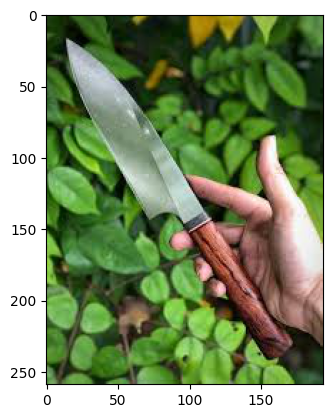

1/1 [==============================] - 0s 61ms/step
GUN


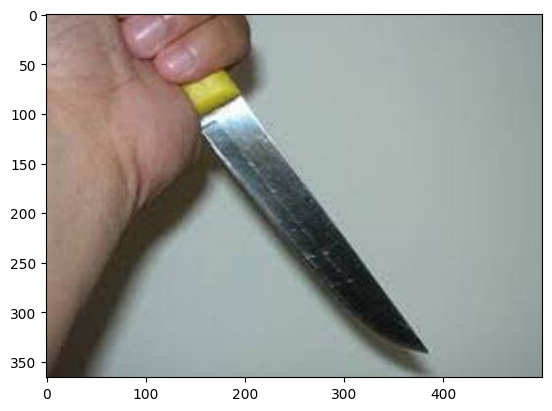

1/1 [==============================] - 0s 43ms/step
GUN


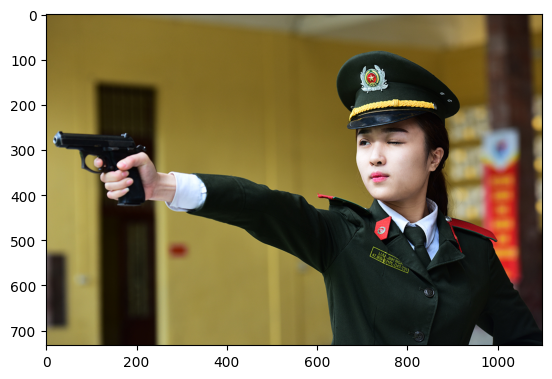

1/1 [==============================] - 0s 39ms/step
SAFE


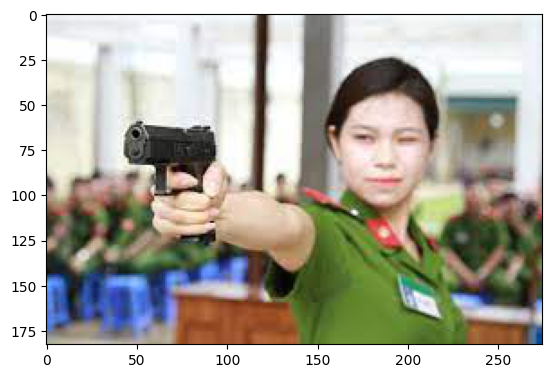

1/1 [==============================] - 0s 57ms/step
GUN


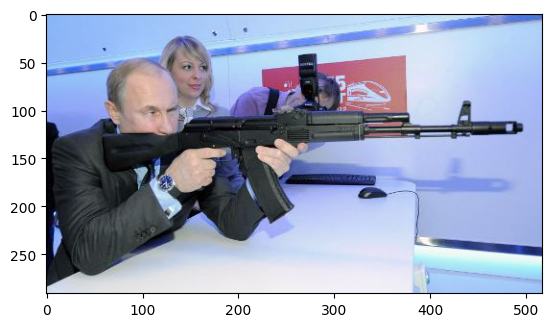

1/1 [==============================] - 0s 74ms/step
RIFLE


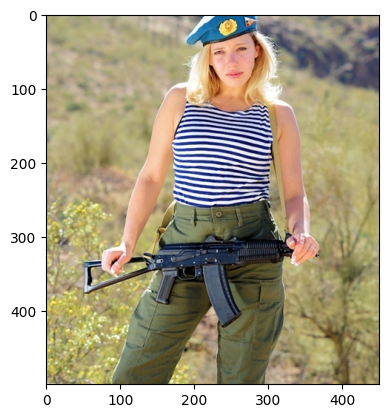

1/1 [==============================] - 0s 74ms/step
KNIFE


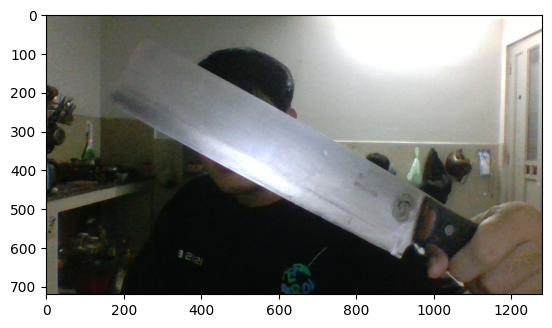

1/1 [==============================] - 0s 61ms/step
GUN


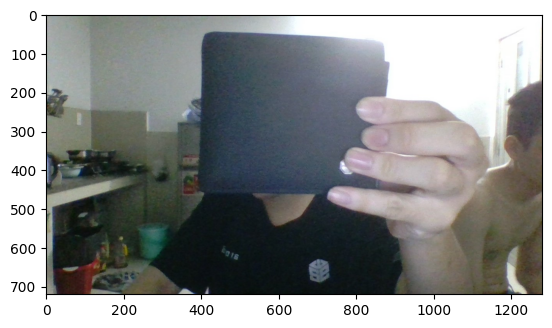

1/1 [==============================] - 0s 60ms/step
SAFE


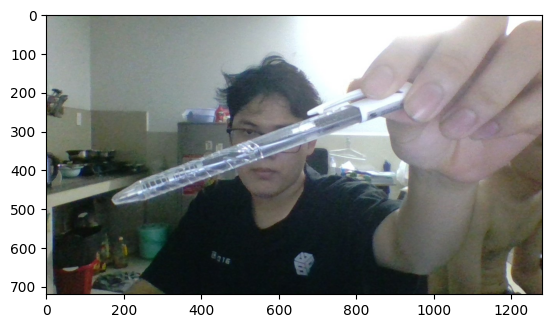

1/1 [==============================] - 0s 66ms/step
SAFE


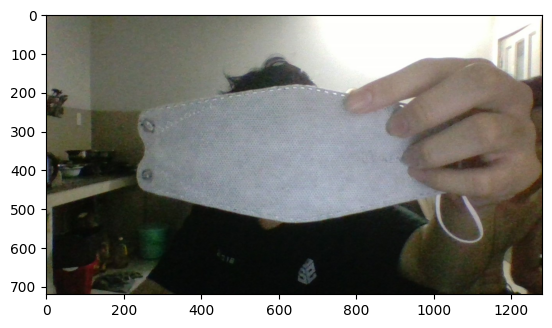

1/1 [==============================] - 0s 73ms/step
GUN


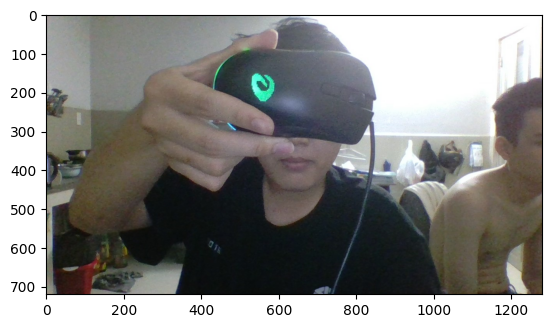

1/1 [==============================] - 0s 49ms/step
GUN


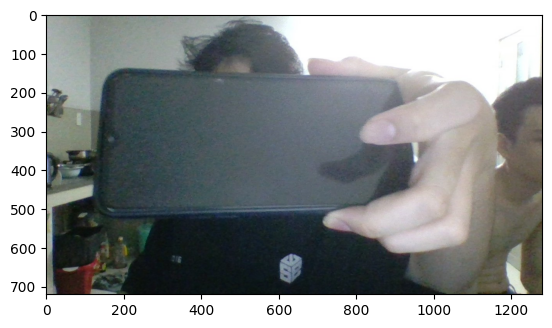

1/1 [==============================] - 0s 50ms/step
KNIFE


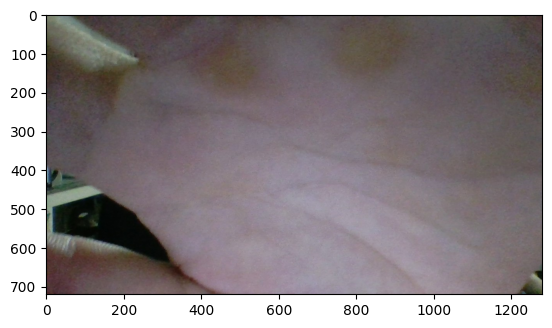

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/checkmv/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)

  photo = load_img(folder +   file, target_size = (100, 100))
  photo=img_to_array(photo)
  #chuyển đổi kiểu dữ liệu
  photo=photo.astype('float32')
  #chuẩn hóa các giá trị pixel trong mảng photo về khoảng [0, 1]
  photo=photo/255
  #thêm một chiều mới vào mảng photo để phù hợp với đầu vào của mô hình
  photo=np.expand_dims(photo,axis=0)
  #dùng mô hình đã huấn luyện để dự đoán nhãn của hình ảnh
  #Hàm predict trả về xác suất của các lớp
  #argmax được sử dụng để lấy chỉ số của lớp có xác suất cao nhất
  result=(model.predict(photo).argmax())
  class_name=['','RIFLE', 'GUN', 'KNIFE','SAFE']
  print(class_name[result])
  plt.show()

In [ ]:
model.save('MachineVision.h5')

In [ ]:
from google.colab import files
files.download('MachineVision.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>